- So far we estimated the density by assuming a functional form and then estimating the parameters of the function
- Some times the distribution may not fit any of the typical distributions that are assumed.
- In this case we may have to find a way to estimate the distribution without making such assumptions and which depends on the data set available to us only.
- Since there is no functional form assumed there is no parameter to be estimated. Hence the method discussed today is generally called **Non-parametric Estimation**

Of course we do make certain assumptions about the probability density function estimated. Denoted by $f(x)$ it is assumed to be suitably smooth (differentiable). And we have the a collection of observations (data samples) which come from the distribution $f(x)$. We denote the data set by $X = \{ x_1,x_2,x_3 \cdots x_N\} $. 

### Histogram Approximation

What we do is to break the input space into bins and measure the frequency of each bin ( number of data points in each bin). Let us see how this works by considering the one dimensional case. Divide the x-axis into bins of length h and count how many data points fall in each bin. For instance suppose $k_i$ elements fall in the $i^{th}$ bin out of a total of $N$ elements. Then our notion of probability prompts us to say that the probability of the bin is $P_i = \frac{k_i}{N}$. Let the bin cover an interval of length say $h$. If $h$ is small enough then we can assume that the pdf is constant over the bin. This implies that $P_i = \hat p(x) h $ or $\hat p(x) = \frac{P_i}{h} = \frac{k_i}{Nh}$ where $x$ is any point on the bin.

The question under what conditions will this converge to the true pdf $p(x)$. What is the ideal interval length $h$? Clearly large $h$ will result in a relatively smooth function $\hat p(x)$ and too small an interval results in spiky estimate. Moreover if a large interval is chosen then the assumption that the pdf is constant over the region does not hold. On the other hand too small an interval can result in bins with no points at all resulting in discontinuities in the estimated pdf. Therefore it is imperative that a concrete analysis of the properties of this estimation is done.

### Notations : 
1. Define $ 1(u) =  \begin{cases} 1 \; if \; \lvert u \rvert < 1/2 \\ 0 \; otherwise \end{cases}$. Therefore $1(\frac{x-x_i}{h}) = 1$ only if $x_i \in (x-h/2,x+h/2)$. Also note that the integral of the function $1$ is 1.
We shall express the estimated pdf $\hat p(x) $ interms of $1$ as : 
\begin{equation} \hat p(x) = \frac{1}{nh} \sum_{i=1}^{n} 1(\frac{x-x_i}{h}) \end{equation}
   

The question is what is the optimal interval width $h$ for a given sample size $n$. On what ground can we define optimality? Clearly from the discussion above we agree that $h$ has to be small. But then how small for a given sample size. One intuitive heuristic is that for a small sample size $n$ if too small an interval is chosen then it can happen that none of the $x_i$'s fall in the interval. This would lead to the estimate $\hat p(x) $ to become $0$. Therefore you cannot afford to have a very small interval. On the other hand if the number of samples is very high then it is possible to have a small interval and the estimate is likely to be close to the actual pdf $p(x)$. The key to controlling the accuracy of the estimate is to control the parameter $h$ as a function of the sample size. Let us see what is the relation. For that we need certain quantities to be computed. 

#### Important quantities 
1. $E(1(\frac{x-x_i}{h})) = \int_{x_i} 1(\frac{x-x_i}{h}) p(x_i) dx_i $ <br\> By using change of variables by defining $u = \frac{x-x_i}{h} $ we can rewrite the integral as : $ \int_{x_i} 1(u) p(x - uh) dx_i $ <br\>
 Apply Taylor series expansion of $p(x-uh)$ as $p(x) - uhp'(x) + O(h^2)$. Putting this into the definition of expectation we get : <br\>
 $E(1(\frac{x-x_i}{h})) = \int_{u} 1(u) (p(x) - uhp'(x) + O(h^2)) h du = hp(x) + o(h^2) $. <br\>
 We can use this to find the expectation of the estimate $\hat p(x)$ which is given below:<br\>
 $E{\hat p(x) } = \frac{1}{nh} \sum_{i}^{n} E{1(\frac{x-x_i}{h})} = p(x) + O(h^2) $  <br\>  
2. $ Var{1(\frac{x-x_i}{h})} = E 1^2(\frac{x-x_i}{h}) - (E1(\frac{x-x_i}{h}))^2 = hp(x) + O(h^2)$. Using this we can compute the variance of $\hat p(x) $ as : 
\begin{equation}
Var(\hat p(x)) = \sum_i^{n} Var(\frac{1}{nh}1(\frac{x-x_i}{h}) = \frac{1}{nh^2}(hp(x) + O(h^2)) = \frac{p(x)}{nh} + O(\frac{1}{n})) 
\end{equation}
3. $Bias(\hat p(x)) = (E\hat p(x) - p(x))^2 = O(h^4)$

Accuracy is measured in terms of the mean squared error $E(\hat p(x) - p(x))^2 $. In order for the estimate to be consistent ( that is, it converges to the true density $p(x)$) the mse should converge to 0 asymptotically (wrt n).
We need to have a strategy to choose $h$ for large $n$ that mse goes to 0. <br\>
Let us have a closer look at mse. It may be noted that $mse = bias(\hat p(x)) + var(\hat p(x)) = \frac{p(x)}{nh} + O(\frac{1}{n})) + O(h^4)$ 

Therefore for mse to converge to 0 asymptotically $h^4 \rightarrow 0, \frac{1}{nh} \rightarrow 0$ as $n \rightarrow \infty$. For both to happen we choose h such that $h^4$ and $\frac{1}{nh} $ are asymptotically equal. That is 
$h^4 = \Theta(\frac{1}{nh} ) \implies h = \Theta( \frac{1}{n^{1/5}} ) $ . This gives a guidance in the choice of the interval length $h$ for a given sample size $n$. With this choice you can easily see that mse decreases as $O(\frac{1}{n^{4/5}} )$. 

#### Parzen Window Estimation
Looking at the estimate of p(x) written as a sum of discontinuous square functions $1()$ 
centered at $x_i$ we can see that the estimate is not smooth. 
In fact the derivate of $\hat p(x)$ is either $0$ or does not exist. 
Therefore this kernel was replaced by smoother functions like Gaussian which satisfy certain conditions. Denoted by $K()$ 
they:
     1. are Symmetric about 0 (even functions)
     2. are Non-negative (because we are trying to model a non-negative function)
     3. satisfy $\int K(u)du=1$ (this makes sure that the estimate will also integrate to 1)
     

Now the estimate has the form $\hat p(x) = \sum_{i=1}^{n} \frac{1}{nh} K(\frac{x-x_i}{h})$. Prove that integral of $\hat p(x)$ is 1. It is non-negative obviously because of non-negativity of $K$. The analysis of this function also proceeds along the same lines as in the case of using the square window.

#### Important quantities 
K. $E(K(\frac{x-x_i}{h})) = \int_{x_i} K(\frac{x-x_i}{h}) p(x_i) dx_i $ <br\> By using change of variables by defining $u = \frac{x-x_i}{h} $ we can rewrite the integral as : $ \int_{x_i} K(u) p(x - uh) dx_i $ <br\>
 Apply Taylor series expansion of $p(x-uh)$ as $p(x) - uhp'(x) + O(h^2)$. Putting this into the definition of expectation we get : <br\>
 $E(K(\frac{x-x_i}{h})) = \int_{u} K(u) (p(x) - uhp'(x) + O(h^2)) h du = hp(x) + o(h^2) $. <br\>
 We can use this to find the expectation of the estimate $\hat p(x)$ which is given below:<br\>
 $E{\hat p(x) } = \frac{K}{nh} \sum_{i}^{n} E{K(\frac{x-x_i}{h})} = p(x) + O(h^2) $  <br\>  
2. $ Var{K(\frac{x-x_i}{h})} = E K^2(\frac{x-x_i}{h}) - (EK(\frac{x-x_i}{h}))^2 = hp(x)\int K^2(u)du + O(h^2)$. Using this we can compute the variance of $\hat p(x) $ as : 
\begin{equation}
Var(\hat p(x)) = \sum_i^{n} Var(\frac{1}{nh}K(\frac{x-x_i}{h}) = \frac{1}{nh^2}(hp(x) + O(h^2)) = \frac{p(x)}{nh} + O(\frac{1}{n})) 
\end{equation}
3. $Bias(\hat p(x)) = (E\hat p(x) - p(x))^2 = O(h^4)$

As in the case above the mean squared error is the sum of bias and variance and hence arguing in the same way we reach the relation $h^4 = \Theta(\frac{1}{nh})$ between $h$ and $1/nh$. This leads to $h = \Theta(\frac{1}{n^{1/5}})$. Practically $h$ is taken as $\frac{c}{n^{1/5}}$. Determining $c$ is also an estimation problem. In the example code below the constant $c$ was found by trial and error.

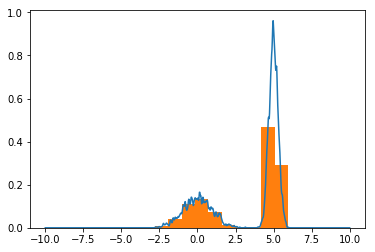

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

def squareKernel(u):
    if abs(u)>=0 and abs(u)<=1:
        return 1
    return 0


def parzenWindow(x, xtrain, h, kernel = 'g'):
    n = xtrain.shape[0]
    z = np.subtract(xtrain, x)/h
    if kernel == 'g':
        pdf = ((1/np.sqrt(2*np.pi))*np.exp(-(z*z)/2)).sum()
    if kernel == 's':
        g = np.vectorize(squareKernel, otypes=[np.ndarray])
        pdf = g(z).sum()
    pdf = pdf/(n*h)
    return pdf

n = 1500
xdata = np.linspace(-10,10,1000)
xtrain = np.random.randn(n)
xtrain = np.concatenate((xtrain,5+0.3*np.random.randn(2*n)))
#xtrain = np.concatenate((xtrain,-4+0.7*np.random.randn(n)))
ntotal = xtrain.shape[0]
c = 25
h = c/math.pow(ntotal,0.8)
p = []
for x in xdata:
    p.append(parzenWindow(x,xtrain,h,kernel='g'))

plt.plot(xdata,p)
plt.hist(xtrain, normed=1)
plt.show()
